In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from math import exp
from sklearn.preprocessing import StandardScaler

In [121]:
data = pd.read_csv('data-logistic.csv')

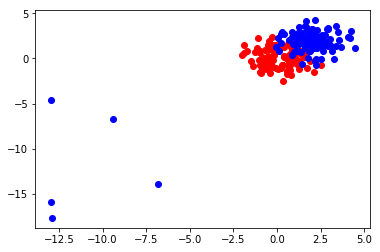

In [122]:
X_1 = data[data['Class'] == 1]
X_0 = data[data['Class'] == -1]
plt.plot(X_0['Param1'], X_0['Param2'], 'ro')
plt.plot(X_1['Param1'], X_1['Param2'], 'bo')
plt.show()

In [123]:
def grad_sp(data, C=0, k = 0.1, delta = 1e-5, w = (0,0)):
    w_1 = w[0]
    w_2 = w[1]
    w_1_old = w_1 + 10000
    w_2_old = w_2 + 10000
    i = 0
    while((((w_1 - w_1_old)**2 + (w_2 - w_2_old)**2)**(0.5) > delta) and (i < 10000)):
        w_1_old, w_2_old = w_1, w_2
        sum_1 = 0
        sum_2 = 0
        for line in data.values:
            y_i = int(line[0])
            x_i_1 = line[1]
            x_i_2 = line[2]
            sum_1 += y_i * x_i_1 * (1 - 1/(1 + exp(-y_i*(w_1*x_i_1 + w_2*x_i_2))))
            sum_2 += y_i * x_i_2 * (1 - 1/(1 + exp(-y_i*(w_1*x_i_1 + w_2*x_i_2))))
        w_1 = w_1 + (k*sum_1/len(data.values)) - k*C*w_1
        w_2 = w_2 + (k*sum_2/len(data.values)) - k*C*w_2
        i += 1
    print(i)
    return (w_1, w_2)

In [124]:
def sigmoid(data, w_1, w_2):
    result = []
    for line in data.values:
        result.append(1/(1+exp(-w_1*line[1] - w_2*line[2])))
    return result

In [125]:
w_1,w_2 = grad_sp(data)
a_x = sigmoid(data,w_1,w_2)
print(roc_auc_score(list(data_2['Class']), a_x))

244
0.9268571428571428


In [126]:
w_1,w_2 = grad_sp(data, C=10)
a_x = sigmoid(data,w_1,w_2)
print(roc_auc_score(list(data_2['Class']), a_x))

8
0.9362857142857142
